In [2]:
import gym
from stable_baselines3 import PPO
from stable_baselines3 import A2C
from stable_baselines3.ppo.policies import CnnPolicy
from stable_baselines3.ppo.policies import MlpPolicy
from utils.adversary_env import AdversaryEnv
from utils.cartpole_wrapper import CartPoleWrapper
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# Load target model
target_model = A2C.load("../a2c/model/lunarlander_v2_a2c_3M_to_11M")

In [3]:
# Test target model - for info on why the env is wrapped with Monitor check the evaluate_policy function
mean_reward, std_reward = evaluate_policy(target_model, Monitor(gym.make('LunarLander-v2')), n_eval_episodes=50)
print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward: 244.37 +/- 76.39


In [4]:
# Create adversary with adversary env
adversary_env = AdversaryEnv(gym.make('LunarLander-v2'), target_model)
adversary = PPO(MlpPolicy, adversary_env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Train adversary
log_dir = "./out/training-log/"
log_path = log_dir + f"adversary-adversary-lunarlander-v2/"
save_dir = "./models/adversary-lunarlander-v2/"

timesteps = 50000

adversary.learn(
        total_timesteps=timesteps,
        callback=None,
        log_interval=-1,
        eval_env=adversary_env, 
        eval_freq=5000, 
        n_eval_episodes=100,
        tb_log_name='PPO',
        eval_log_path=log_path, 
        reset_num_timesteps=False
        )

# Save adversary
adversary.save(save_dir + f"adversary_lunarlander_v2_{timesteps}")

In [6]:
# Load adversary
save_dir = "./models/adversary-lunarlander-v2/"

adversary = PPO.load(save_dir + f"adversary_lunarlander_v2_50000")
adversary_env = AdversaryEnv(gym.make('LunarLander-v2'), target_model)

In [7]:
import numpy as np
import pandas as pd
from strategically_timed_attack import StrategicallyTimedAttack

# Evaluate strategically timed adversarial attack over different beta
data_dict = {
    'beta': [],
    'mean_rew': [],
    'mean_perturbation': [],
    'mean_n_timesteps': [],
    'mean_n_attacks': []
}

n_episodes = 50

for j in range(1, 100):
    beta = j/100

    all_episodes_rewards = []
    all_episodes_perturbation = []
    all_episodes_n_timesteps = []
    all_episodes_n_attacks = []

    for i in range(0, n_episodes):
        # Run attack on a2c model
        env = gym.make('LunarLander-v2')
        ua = StrategicallyTimedAttack(env=env, model=target_model, attack=adversary, epsilon=0.25, beta=beta)
        ua.perform_attack()

        all_episodes_rewards.append(ua.reward_total)
        all_episodes_perturbation.append(ua.perturbation_total)
        all_episodes_n_timesteps.append(ua.frames_count)
        all_episodes_n_attacks.append(ua.n_attacks)

        ua.reset_attack()

    data_dict['beta'].append(beta)
    data_dict['mean_rew'].append(np.round(np.mean(all_episodes_rewards), 2))
    data_dict['mean_perturbation'].append(np.round(np.mean(all_episodes_perturbation), 2))
    data_dict['mean_n_timesteps'].append(np.round(np.mean(all_episodes_n_timesteps), 2))
    data_dict['mean_n_attacks'].append(np.round(np.mean(all_episodes_n_attacks), 2))

    print("------------------------------------------")
    print(
        f"{data_dict['beta'][-1] = }: \n" +
        f"{data_dict['mean_rew'][-1] = } \n" +
        f"{data_dict['mean_perturbation'][-1] = } \n" +
        f"{data_dict['mean_n_timesteps'][-1] = } \n" +
        f"{data_dict['mean_n_attacks'][-1] = }"
        )
    print("------------------------------------------")

------------------------------------------
data_dict['beta'][-1] = 0.01: 
data_dict['mean_rew'][-1] = -65.09 
data_dict['mean_perturbation'][-1] = 191.01 
data_dict['mean_n_timesteps'][-1] = 103.98 
data_dict['mean_n_attacks'][-1] = 103.98
------------------------------------------
------------------------------------------
data_dict['beta'][-1] = 0.02: 
data_dict['mean_rew'][-1] = -65.87 
data_dict['mean_perturbation'][-1] = 149.31 
data_dict['mean_n_timesteps'][-1] = 80.42 
data_dict['mean_n_attacks'][-1] = 80.42
------------------------------------------
------------------------------------------
data_dict['beta'][-1] = 0.03: 
data_dict['mean_rew'][-1] = -60.67 
data_dict['mean_perturbation'][-1] = 157.48 
data_dict['mean_n_timesteps'][-1] = 85.16 
data_dict['mean_n_attacks'][-1] = 85.16
------------------------------------------
------------------------------------------
data_dict['beta'][-1] = 0.04: 
data_dict['mean_rew'][-1] = -67.69 
data_dict['mean_perturbation'][-1] = 154.32 


In [8]:
print(data_dict)

{'beta': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99], 'mean_rew': [-65.09, -65.87, -60.67, -67.69, -57.23, -63.71, -60.51, -69.4, -65.94, -47.7, -68.21, -70.74, -60.15, -64.48, -63.67, -57.71, -58.49, -63.93, -64.04, -57.08, -59.2, -66.07, -65.79, -69.33, -65.11, -56.52, -67.51, -65.05, -76.53, -75.36, -65.93, -59.47, -68.41, -66.8, -65.5, -59.42, -58.77, -66.9, -63.34, -65.99, -67.34, -58.91, -60.96, -72.64, -64.44, -60.47, -65.17, -66.1, -62.57, -67.05

In [10]:
# Create DataFrame
data_df = pd.DataFrame(
        data_dict, 
        columns=data_dict.keys(),
        )
data_df.set_index('beta', inplace=True)

# Save data as .csv file
with open("./out/data/" + "strategically_timed_attack_beta", 'w') as f:
    data_df.to_csv(f)

data_df

,mean_rew,mean_perturbation,mean_n_timesteps,mean_n_attacks
beta,,,,
0.01,-65.09,191.01,103.98,103.98
0.02,-65.87,149.31,80.42,80.42
0.03,-60.67,157.48,85.16,85.16
0.04,-67.69,154.32,83.74,83.74
0.05,-57.23,186.46,102.92,102.92
...,...,...,...,...
0.95,-63.56,148.88,92.32,80.22
0.96,-52.00,150.21,92.50,81.56
0.97,-53.12,134.14,91.38,72.96


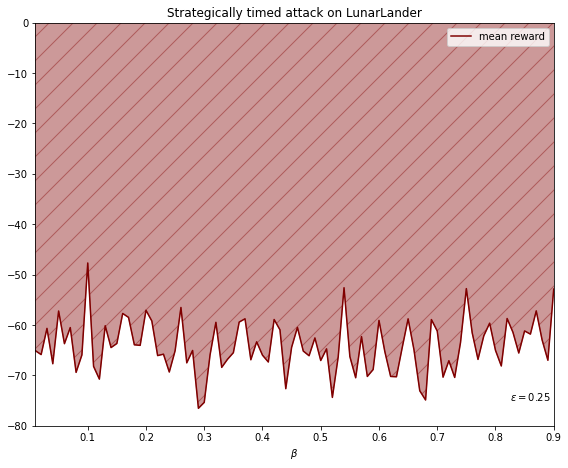

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load data
with open("./out/data/" + "strategically_timed_attack_beta", 'r') as f:
    data_df = pd.read_csv(f, index_col=0)

# Plot data_df
fig = plt.figure(figsize=(9,7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.plot(data_df.index, data_df['mean_rew'], color='maroon', label='mean reward', alpha=1, zorder=0)
plt.fill_between(data_df.index, data_df['mean_rew'], color='maroon', hatch='/', step=None, alpha=0.4)
# plt.vlines(data_df.index, ymin=0, ymax=data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), alpha=1, zorder=1)
# plt.scatter(data_df.index, data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), label='mean reward', marker='D', alpha=1, zorder=2)

# plt.plot(data_df.index, data_df['mean_perturbation'], label='mean perturbation', color='crimson', linestyle='dotted', alpha=1, zorder=0)

# plt.plot(data_df.index, data_df['mean_n_timesteps'], label='mean n timesteps', color='purple', linestyle='dotted', alpha=1, zorder=0)

# plt.plot(data_df.index, data_df['mean_n_attacks'], label='mean n attacks', color='black', linestyle='dashed', alpha=1, zorder=0)

plt.title("Strategically timed attack on LunarLander")
plt.legend()
plt.xlabel('$\\beta$')
# plt.ylabel()
# plt.yscale('symlog')
# plt.axis([0.01, 0.9, -500, 500]) # plt.axis([xmin, xmax, ymin, ymax])
plt.axis([0.01, 0.9, -80, 0.00001])
plt.text(0.825, -75, "$\epsilon = 0.25$")
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
plt.show()

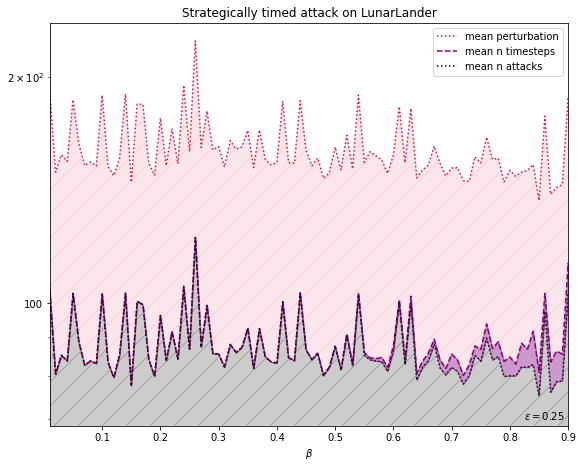

In [25]:
# Plot data_df
fig2 = plt.figure(figsize=(9,7))
ax2 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])
# plt.plot(data_df.index, data_df['mean_rew'], color='darkslategray', alpha=1, zorder=0)
# plt.vlines(data_df.index, ymin=0, ymax=data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), alpha=1, zorder=1)
# plt.scatter(data_df.index, data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), label='mean reward', marker='D', alpha=1, zorder=2)

plt.plot(data_df.index, data_df['mean_perturbation'], label='mean perturbation', color='crimson', linestyle='dotted', alpha=1, zorder=0)
plt.fill_between(data_df.index, data_df['mean_perturbation'], data_df['mean_n_timesteps'], color='crimson', hatch='/', step=None, alpha=0.1)

plt.plot(data_df.index, data_df['mean_n_timesteps'], label='mean n timesteps', color='purple', linestyle='dashed', alpha=1, zorder=0)
plt.fill_between(data_df.index, data_df['mean_n_timesteps'], data_df['mean_n_attacks'], color='purple', step=None, alpha=0.4)

plt.plot(data_df.index, data_df['mean_n_attacks'], label='mean n attacks', color='black', linestyle='dotted', alpha=1, zorder=0)
plt.fill_between(data_df.index, data_df['mean_n_attacks'], color='black', hatch='/', step=None, alpha=0.2)

plt.title("Strategically timed attack on LunarLander")
plt.legend()
plt.xlabel('$\\beta$')
# plt.ylabel()
plt.yscale('log')
# plt.axis([0.01, 0.9, 0, 250]) # plt.axis([xmin, xmax, ymin, ymax])
plt.xlim([0.01, 0.9])
for axis in [ax2.xaxis, ax2.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
plt.text(0.825, 70, "$\epsilon = 0.25$")
plt.show()